In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(123)  # for reproducibility

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Load and preprocess data
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Feature processing
# Reshape to add depth dimension (for backends that assume RGB)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

# Label processing
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

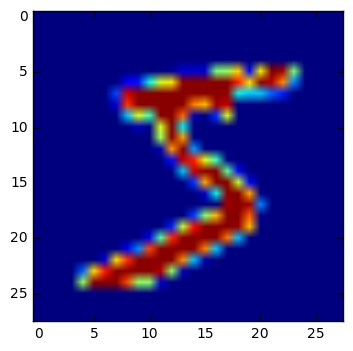

In [4]:
plt.imshow(X_train[0, :, :, 0])

# Now the model!

In [5]:
model = Sequential()

# Input layer
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu',
                        input_shape=X_train.shape[1:],
                        data_format='channels_last'))

# A second Conv2D layer. Not sure why the shape is what it
# is though.
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))

# This layer reduces parameters by taking the max value across
# each set of 2x2 parameters. Essentially smooths the data.
model.add(MaxPooling2D(pool_size=(2, 2)))

# This Dropout layer randomly removes units from the network
# during training to prevent overfitting.
model.add(Dropout(0.25))

# Now to add... some other kind of layers?
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, Y_train, 
                    batch_size=50, epochs=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 201s - loss: 0.1951 - acc: 0.9397   


In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [9]:
for i, metric in enumerate(model.metrics_names):
    print('{0}: {1:.03f}'.format(metric.upper(), score[i]))

LOSS: 0.048
ACC: 0.984


In [10]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

/Users/tsalo/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/tsalo/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


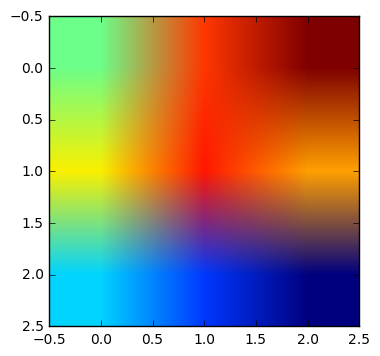

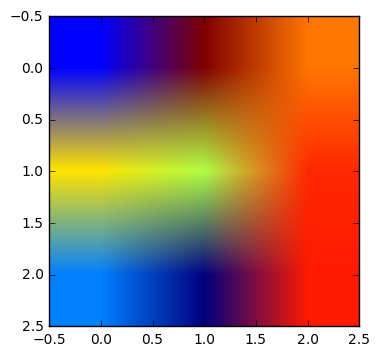

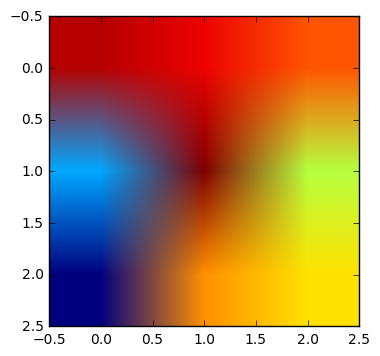

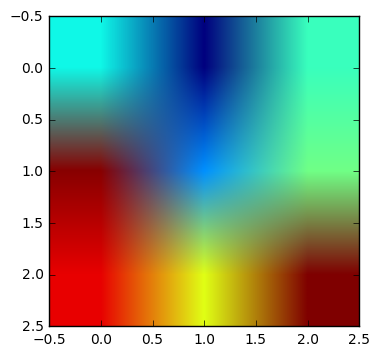

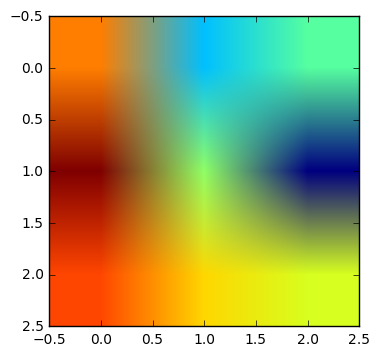

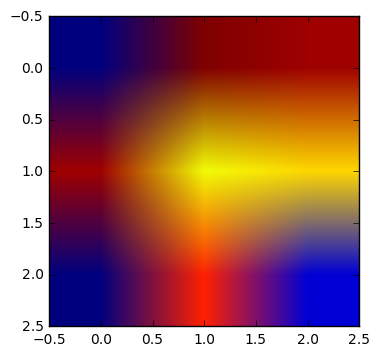

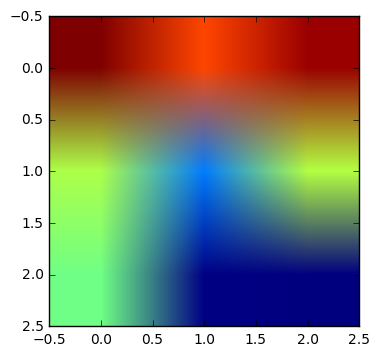

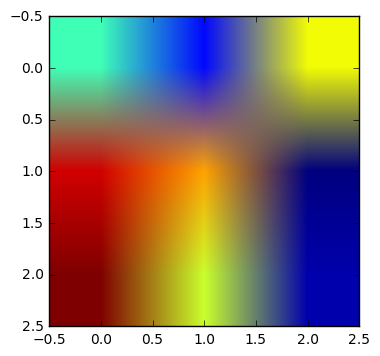

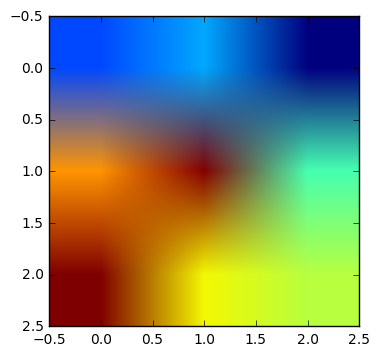

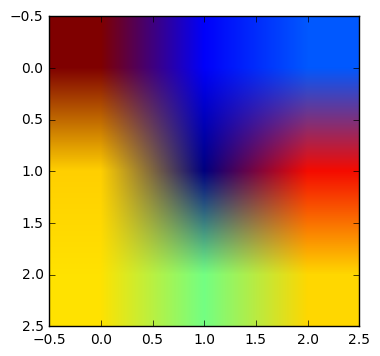

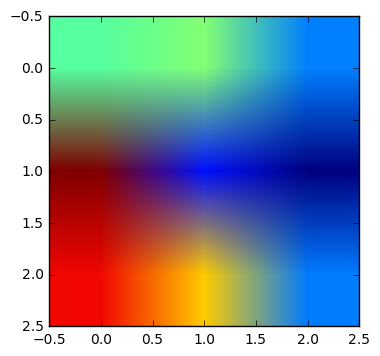

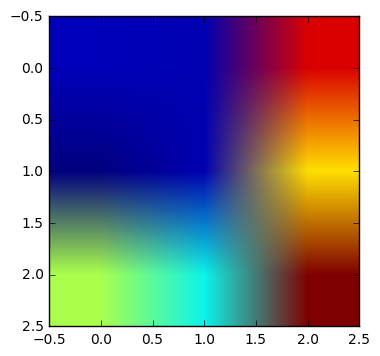

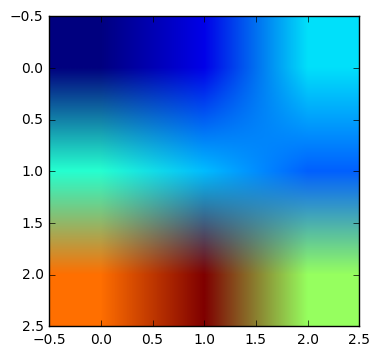

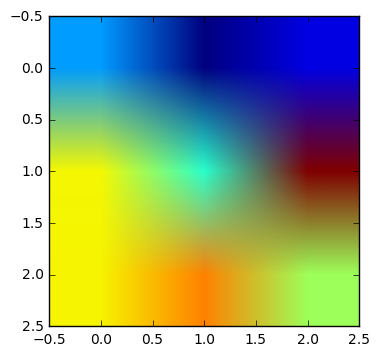

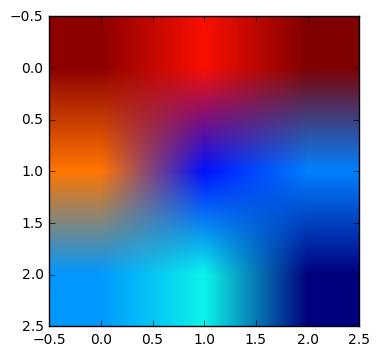

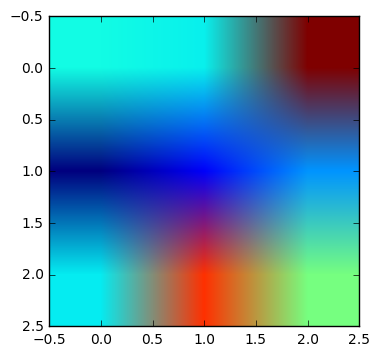

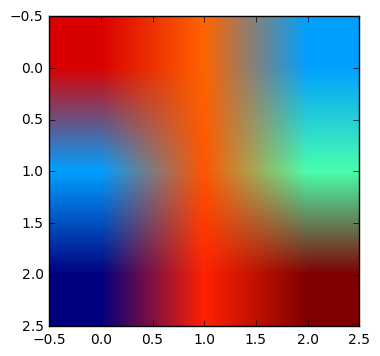

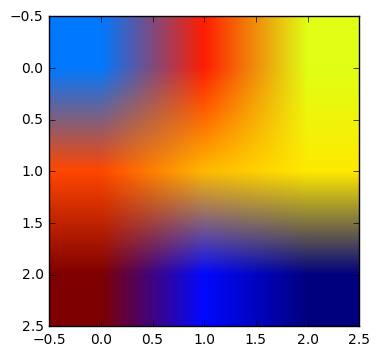

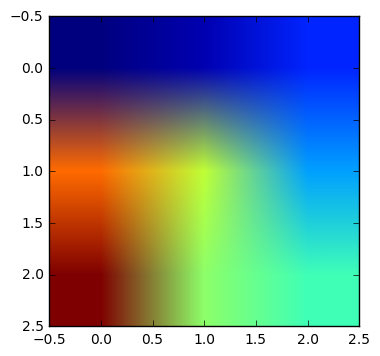

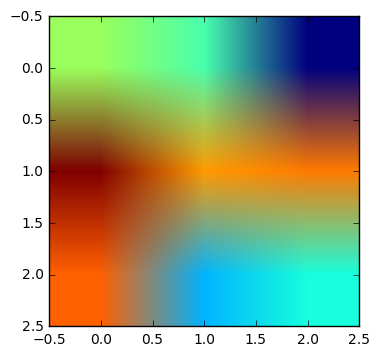

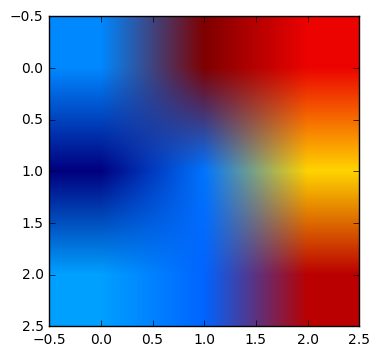

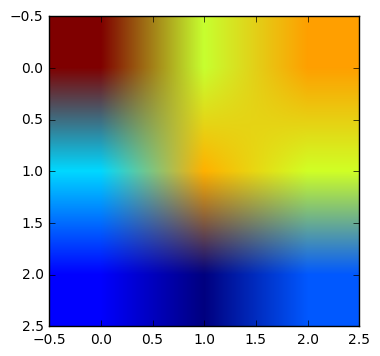

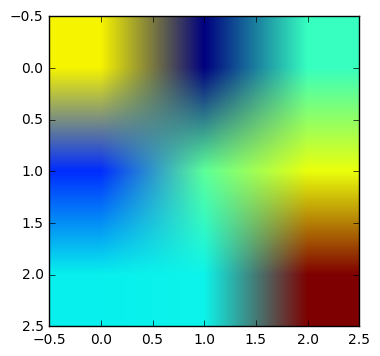

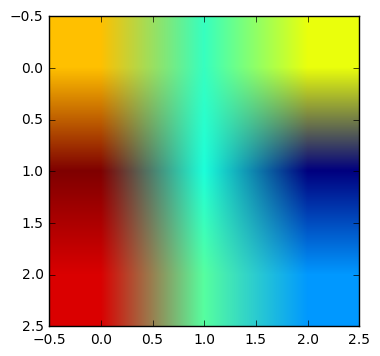

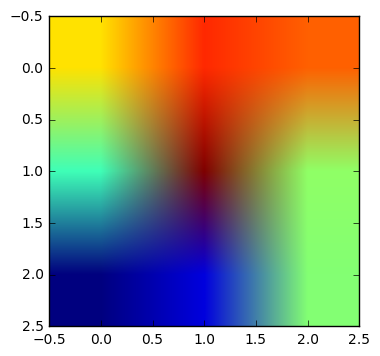

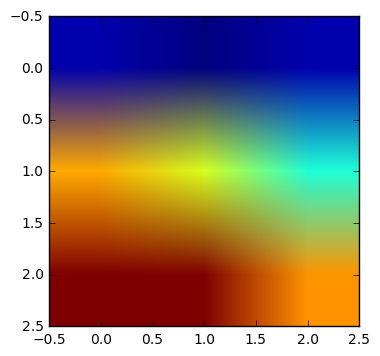

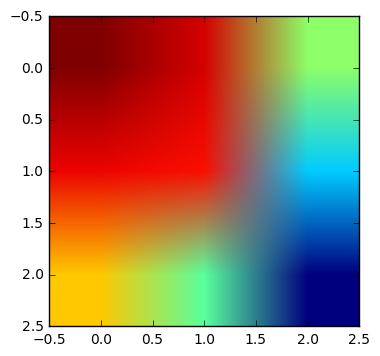

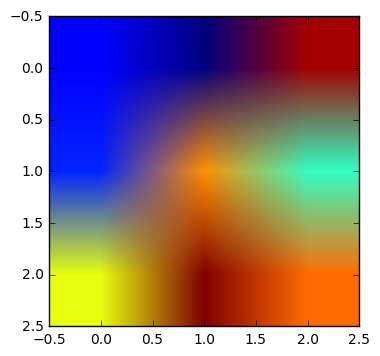

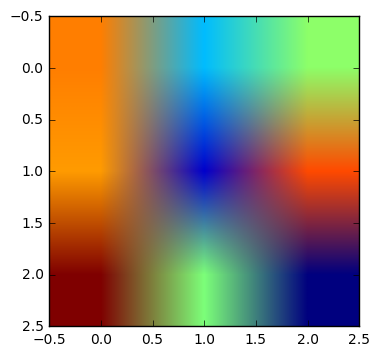

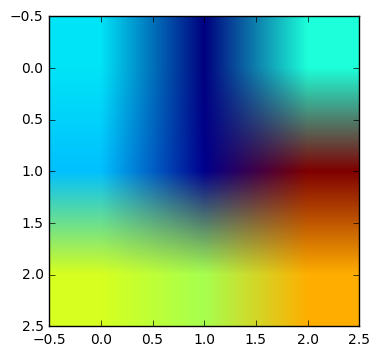

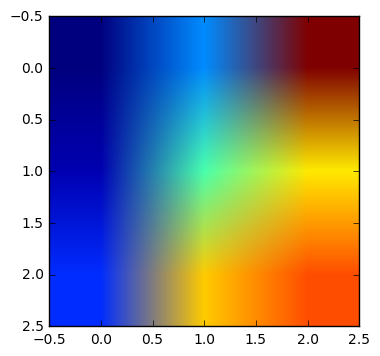

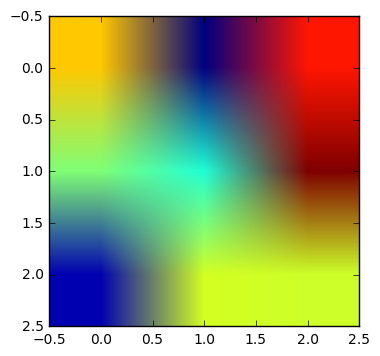

In [11]:
layer = model.layers[0]
weights = layer.get_weights()

for i in range(weights[0].shape[-1]):
    fig, ax = plt.subplots()
    ax.imshow(weights[0][:, :, 0, i])
    fig.show()